In this notebook, we will try to distinguish spam messages from ham messages using nltk.

In [1]:
import nltk

In [19]:
#nltk.download_shell()
from nltk.corpus import stopwords

In [3]:
import numpy as np
import pandas as pd

Get the all messages as a list

In [4]:
messages = [line.rstrip() for line in open('C:/Users/Lenovo/Desktop/datasets/SMSSpamCollection')]

In [5]:
len(messages)

5574

Print the first 10 messages and look at how spam messages are different than the ham ones.

In [6]:
for no, msg in enumerate(messages[:10]):
    print(no, msg)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

Convert the list into a dataframe showing the message and whether it is spam or ham.

In [7]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/datasets/SMSSpamCollection', sep='\t', names=['class', 'message'])
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.describe()

,class,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


The number of unique messages are less than the total number of messages, which makes sense as many messages could be sort of 'okay', 'sorry', etc. Print out the top 10 messages that are repeated most.

In [9]:
df.groupby('message').size().sort_values(ascending=False).head(10)

message
Sorry, I'll call later                                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                                    12
Ok...                                                                                                                                                                                  10
Ok                                                                                                                                                                                      4
Okie                                                                                                                                                                                    4
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur

Find out how many messages there are in each message class, with the number of unique messages.

In [10]:
df.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
Add a new column showing the length of characters in each message.

SyntaxError: invalid syntax (<ipython-input-11-72e5f5b36c26>, line 1)

In [12]:
df['length'] = df.message.apply(len)
df.sample(5)

,class,message,length
1235,ham,Hello-/@drivby-:0quit edrunk sorry iff pthis m...,125
3596,ham,Huh but i cant go 2 ur house empty handed right?,48
271,ham,"Come to mu, we're sorting out our narcotics si...",53
1903,ham,My sister got placed in birla soft da:-),40
1614,ham,Thnx dude. u guys out 2nite?,28


How are the length of messages distributed?

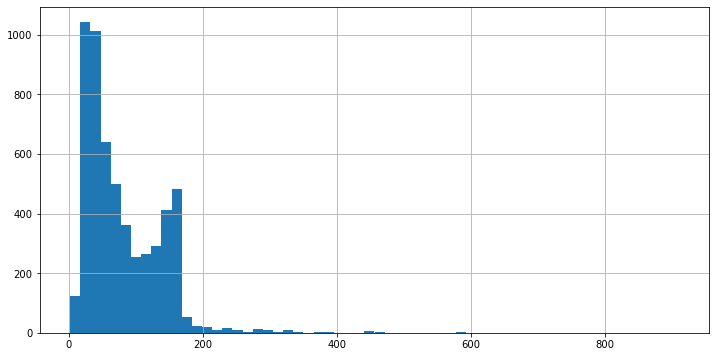

In [13]:
df['length'].hist(bins=60, figsize=(12,6));

We see that we have only a couple messages whose lengths are greater than 600. Print the message with the largest length.

In [14]:
df[df.length == max(df.length)].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Demonstrate how the length of messages are distributed in each message class.

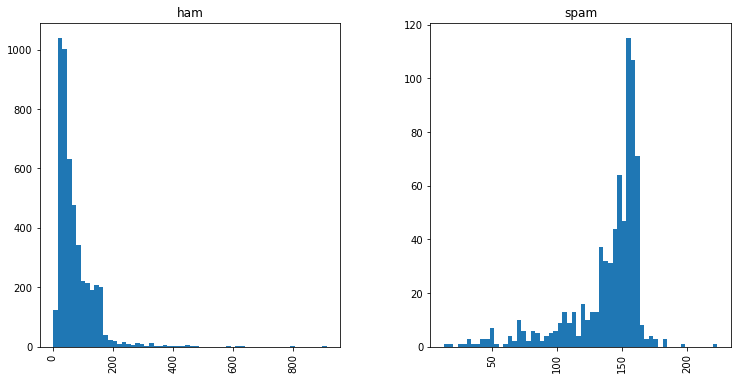

In [15]:
df.hist(column='length', by='class', bins=60, figsize=(12,6));

We notice that the spam messages tend to be longer than the ham messages.

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Define a function that will remove punctutations and stopwords from a message, and will return a list of remaining words.

In [17]:
def no_stopunc(msg):    
    nopunc = [item for item in msg if item not in string.punctuation]
    nopunc_word = ''.join(nopunc)
    
    no_stop = [item for item in nopunc_word.split() if item.lower() not in stopwords.words('english')]
    return no_stop 

In [20]:
df.message.apply(no_stopunc)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

bag_words = CountVectorizer(analyzer=no_stopunc).fit(df.message)

How many words are there in the bags of the words of the dataset?

In [22]:
print(len(bag_words.vocabulary_))

11425


Check the bag of words for a specific message.

In [23]:
msg_31 = df.loc[31, 'message']
msg_31

"Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't go there! Not doing too badly cheers. You? "

The bag of words for this message is:

In [24]:
bow31 = bag_words.transform([msg_31])
print(bow31)

  (0, 423)	2
  (0, 3997)	1
  (0, 4416)	1
  (0, 4509)	1
  (0, 4719)	1
  (0, 4898)	1
  (0, 5378)	1
  (0, 5450)	1
  (0, 5483)	1
  (0, 6468)	1
  (0, 6864)	1
  (0, 6906)	2
  (0, 7800)	1
  (0, 8336)	1
  (0, 10005)	1
  (0, 10816)	1
  (0, 11145)	1


We can find which words these numbers correspond to as follows:

In [25]:
bag_words.get_feature_names()[6906]

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'got'

In [28]:
bow31.shape

(1, 11425)

We get 1 times 11425, which is the number of all vocabularies.

Get the bag-of-words for the all messages.

In [30]:
messages_bow = bag_words.transform(df.message)

In [31]:
messages_bow.shape

(5572, 11425)

Namely, there are 11425 different words in total. Check how many of the entries in the count matrix is nonzero.

In [33]:
messages_bow.nnz

50548

Find the sparsity of the count matrix.

In [34]:
print(messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

0.0007940295412668218


Transform the count matrix to a normalized tf-idf representation.

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()

In [41]:
tfidf.fit(messages_bow)

TfidfTransformer()

In [43]:
tfidf31 = tfidf.transform(bow31)

In [44]:
print(tfidf31)

  (0, 11145)	0.17915688667152585
  (0, 10816)	0.20238739750262572
  (0, 10005)	0.2839116856226002
  (0, 8336)	0.15485466353225785
  (0, 7800)	0.13465653373058326
  (0, 6906)	0.27540077343506214
  (0, 6864)	0.13296098637468345
  (0, 6468)	0.2839116856226002
  (0, 5483)	0.2618807124600573
  (0, 5450)	0.2839116856226002
  (0, 5378)	0.27102439246811844
  (0, 4898)	0.2839116856226002
  (0, 4719)	0.2839116856226002
  (0, 4509)	0.2839116856226002
  (0, 4416)	0.17688563669480084
  (0, 3997)	0.2839116856226002
  (0, 423)	0.23181979751136056


In [53]:
tfidf_messages = tfidf.transform(messages_bow)

Get the idf for the word 'love'

In [52]:
tfidf.idf_[bag_words.vocabulary_['love']]

4.773658523649919

Predict the class of messages with Naive-Bayes algorithm.

In [59]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(tfidf_messages, df['class'])

In [60]:
model.predict(bow31)

array(['ham'], dtype='<U4')

Check the class of the message:

In [62]:
df.loc[31, 'class']

'ham'

In [66]:
df

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


# Pipeline

Build a pipeline and predict the classes of the messages the pipeline isn't trained on. Finally, get the metrics of the model.

In [68]:
from sklearn.model_selection import train_test_split

X = df.message
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=no_stopunc)),
    ('tfidf', TfidfTransformer()),
    ('predict', MultinomialNB())
])

In [70]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function no_stopunc at 0x0000023CE88CB5E0>)),
                ('tfidf', TfidfTransformer()), ('predict', MultinomialNB())])

In [71]:
predictions = pipeline.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[971   0]
 [ 42 102]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       971
        spam       1.00      0.71      0.83       144

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

